# Cut Off Trees for Golf Event

You are asked to cut off all the trees in a forest for a golf event. The forest is represented as an m x n matrix. In this matrix:

0 means the cell cannot be walked through.
1 represents an empty cell that can be walked through.
A number greater than 1 represents a tree in a cell that can be walked through, and this number is the tree's height.
In one step, you can walk in any of the four directions: north, east, south, and west. If you are standing in a cell with a tree, you can choose whether to cut it off.

You must cut off the trees in order from shortest to tallest. When you cut off a tree, the value at its cell becomes 1 (an empty cell).

Starting from the point (0, 0), return the minimum steps you need to walk to cut off all the trees. If you cannot cut off all the trees, return -1.

Note: The input is generated such that no two trees have the same height, and there is at least one tree needs to be cut off.

 

**Example 1:**

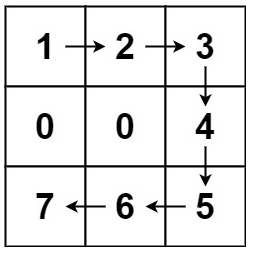
Input: forest = [[1,2,3],[0,0,4],[7,6,5]]

Output: 6
Explanation: Following the path above allows you to cut off the trees from shortest to tallest in 6 steps.

**Example 2:**


Input: forest = [[1,2,3],[0,0,0],[7,6,5]]

Output: -1
Explanation: The trees in the bottom row cannot be accessed as the middle row is blocked.

**Example 3:**

Input: forest = [[2,3,4],[0,0,5],[8,7,6]]

Output: 6
Explanation: You can follow the same path as Example 1 to cut off all the trees.
Note that you can cut off the first tree at (0, 0) before making any steps.
 

**Constraints:**

- m == forest.length
- n == forest[i].length
- 1 <= m, n <= 50
- 0 <= forest[i][j] <= 109
- Heights of all trees are distinct.

In [1]:
import heapq
from typing import List

def cutOffTree(forest: List[List[int]]) -> int:
    # Helper function to calculate minimum steps between two points using BFS
    def min_steps_bfs(start, end):
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        queue = [(0, start)]
        visited = set()
        
        while queue:
            steps, curr = heapq.heappop(queue)
            if curr == end:
                return steps
            if curr in visited:
                continue
            visited.add(curr)
            for dx, dy in directions:
                x, y = curr[0] + dx, curr[1] + dy
                if 0 <= x < m and 0 <= y < n and forest[x][y] != 0:
                    heapq.heappush(queue, (steps + 1, (x, y)))
        
        return -1
    
    m, n = len(forest), len(forest[0])
    trees = []
    
    # Create a list of trees with their positions and heights
    for i in range(m):
        for j in range(n):
            if forest[i][j] > 1:
                trees.append((forest[i][j], (i, j)))
    
    # Sort trees by height
    trees.sort()
    
    start = (0, 0)
    total_steps = 0
    
    for _, tree_pos in trees:
        steps = min_steps_bfs(start, tree_pos)
        if steps == -1:
            return -1
        total_steps += steps
        start = tree_pos
    
    return total_steps

# Example usage:
forest = [[1, 2, 3], [0, 0, 4], [7, 6, 5]]
print(cutOffTree(forest))  # Output: 6

6
